# Exercise set 4
## Answered to all questions (1-5).

# Question 1

<span style="font-size:18px">Logistic loss function:</span>
$$
l({\bf w})=\sum_{n=0}^{N-1}ln(1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}}))
$$
<span style="font-size:18px">Gradient of $l({\bf w})$:</span>
$$
\begin{aligned}
l'({\bf w})&=\frac{\partial}{\partial{\bf w}}\sum_{n=0}^{N-1}ln(1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}})) \\
&= \sum_{n=0}^{N-1}\frac{\partial}{\partial{\bf w}}ln(1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}})) \\
\end{aligned}
\tag{1}
\\ \\
$$ 
    
    
$$
\begin{aligned}
\frac{\partial}{\partial{\bf w}}ln(1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}}))&=\frac{1}{1+exp(-y_{n}{\bf w^{T}}{\bf x_{n}})} * \frac{\partial}{\partial{\bf w}}1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}}) \\
&=\frac{1}{1+exp(-y_{n}{\bf w^{T}}{\bf x_{n}})} * \frac{\partial}{\partial{\bf w}}exp(-y_{n}{\bf w^{T}} {\bf x_{n}})
\end{aligned}
\tag{2}
\\ \\
$$
    
    
$$
\begin{aligned}
\frac{\partial}{\partial{\bf w}}exp(-y_{n}{\bf w^{T}} {\bf x_{n}})&=exp(-y_{n}{\bf w^{T}} {\bf x_{n}})*\frac{\partial}{\partial{\bf w}} -y_{n}{\bf w^{T}} {\bf x_{n}}\\
\end{aligned}
\tag{3}
$$
    
$$
\begin{aligned}
\frac{\partial}{\partial{\bf w}}-y_{n}{\bf w^{T}} {\bf x_{n}}&=-y_{n}\frac{\partial}{\partial{\bf w}}{\bf w^{T}} {\bf x_{n}} \\
&=-y_{n}{\bf x_{n}}
\end{aligned}
\tag{4}
$$

<span style="font-size:18px">Therefore:</span>
$$
(1),(2),(3),(4)\Rightarrow l'({\bf w})=\sum_{n=0}^{N-1}\frac{exp(-y_{n}{\bf w^{T}}{\bf x_{n}})}{1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}})}(-y_{n}{\bf x_{n}})
\\\\
$$
    
<span style="font-size:18px">Gradient of $C*{\bf w^{T}}{\bf w}$:</span>
$$
\begin{aligned}
\frac{\partial}{\partial{\bf w}}C*{\bf w^{T}}{\bf w}
&=C*\frac{\partial}{\partial{\bf w}}{\bf w^{T}}{\bf w} \\
&=C*\frac{\partial}{\partial{\bf w}}\sum w_{i}^{2} \\
&=C*(2w_{0}, \cdots, 2w_{P})^{T} \\
&=2C{\bf w} \\
\end{aligned}
\\
$$
    
<span style="font-size:18px">Therefore, the gradient of the *L<sub>2</sub>-regularized logistic loss* is:</span>   
    
$$
l'({\bf w}) = \sum_{n=0}^{N-1}\frac{exp(-y_{n}{\bf w^{T}}{\bf x_{n}})}{1+exp(-y_{n}{\bf w^{T}} {\bf x_{n}})}(-y_{n}{\bf x_{n}}) + 2C{\bf w}
$$

# Question 2

<span style="font-size:18px">a)</span>
![alt text](Q2a.png "Title")

<span style="font-size:18px">b) Number of parameters in each layer</span>

Input layer = 0
    
    No learnable parameters.
    
First convolution = $5*5*3*10+10 = 760$
    
    Convolution window (weight matrix) of size 5x5. Therefore 5*5 learnable parameters.
    
    Need to learn a unique conv. window for each feature map in the input. Therefore *3.
    
    Need to learn a unique conv. window parameters for each feature map in the output. Therefore *10.
    
    Bias for each feature map in output. Therefore +10.
    
    
Max-Pool = 0
    
    No learnable parameters. Just shrinks the size of each feature map.
    
Second convolution = $5*5*10*10+10=2510$
    
    Convolution window (weight matrix) of size 5x5. Therefore 5*5 learnable parameters.
    
    Need to learn a unique conv. window for each feature map in the input. Therefore *10.
    
    Need to learn a unique conv. window parameters for each feature map in the output. Therefore *10.
    
    Bias for each feature map in output. Therefore +10.
    
Max-Pool = 0
    
Flatten = 0
    
    No learnable parameters. Just reduces the dimensionality of the input.
    
Output layer = $2560*2+2 = 5122$
    
    2560 neurons in previous layer connected to output layer of size of 2. Therefore 2560*2 weight parameters.
    
    Also, the neurons in the output layer have bias term each. Therefore +2 parameters.
    
Total number of parameters in network = 8392

# Question 3

In [1]:
import numpy as np
import os
# Load the data
os.chdir('/home/tuomas/Python/DATA.ML.200/Ex4')
dataX = np.loadtxt('X.csv', delimiter=',')
dataY = np.loadtxt('y.csv', delimiter=',')

In [30]:
# Gradient descent

def add_bias(w, X, b):
    new_w = w.tolist()
    new_w.append(b)
    new_X = np.ones((X.shape[0], X.shape[1]+1))
    new_X[:,:-1] = X
    return np.array(new_w), new_X

def log_loss(w):
    loss = 0
    for n in range(X.shape[0]):
        x = X[n]
        y = dataY[n]
        loss += np.log(1 + np.exp(-y * w@x))
        
    return loss

def loss_gradient(w):
    grad = np.zeros(w.shape)
    for n in range(X.shape[0]):
        x = X[n]
        y = dataY[n]
        num = np.exp(-y * w@x)
        denom = 1 + np.exp(-y * w@x)
        grad += (num/denom)*(-y*x)
        
    return grad

def predict(w):
    preds = []
    for n in range(X.shape[0]):
        x = X[n]
        class_1 = (1 / (1 + np.exp(-w@x))) > 0.5
        if class_1:
            preds.append(1)
        else:
            preds.append(-1)
            
    return np.array(preds)

# Initialize w as random
w = np.random.randn(2)
# Add bias term to the model (init. as random as well)
w, X = add_bias(w, dataX, np.random.randn(1)[0])

# Set learning rate
e = 0.01
iterations = 100
old_ws = []
old_accs = []
for i in range(iterations):
    # Update w
    w = w - e*loss_gradient(w)
    # Print info
    print('Iteration {}. w = {}, log-loss = {}'.format(i+1, w[:2], log_loss(w)))
    # Calculate accuracy
    y_hat = predict(w)
    acc = np.sum(y_hat == dataY) / 400.0
    old_accs.append(acc)
    old_ws.append(w)

Iteration 1. w = [-1.40993347  1.51911066], log-loss = 120.0308246119129
Iteration 2. w = [-0.97233901  1.62664125], log-loss = 100.6582735812171
Iteration 3. w = [-0.64919303  1.6856105 ], log-loss = 91.0521173245905
Iteration 4. w = [-0.40953901  1.72960377], log-loss = 85.81339724422338
Iteration 5. w = [-0.2272205   1.76830622], log-loss = 82.54460203484516
Iteration 6. w = [-0.08380088  1.80327307], log-loss = 80.25616945229795
Iteration 7. w = [0.03270673 1.83460917], log-loss = 78.53482482724279
Iteration 8. w = [0.12982235 1.86261584], log-loss = 77.19063349610738
Iteration 9. w = [0.21229145 1.88783656], log-loss = 76.12211418603785
Iteration 10. w = [0.28322348 1.91085883], log-loss = 75.26596446102715
Iteration 11. w = [0.34477385 1.93218611], log-loss = 74.57762982649841
Iteration 12. w = [0.39852951 1.95219344], log-loss = 74.02328617845696
Iteration 13. w = [0.44572056 1.97113183], log-loss = 73.57624251642194
Iteration 14. w = [0.48733564 1.98915342], log-loss = 73.21511

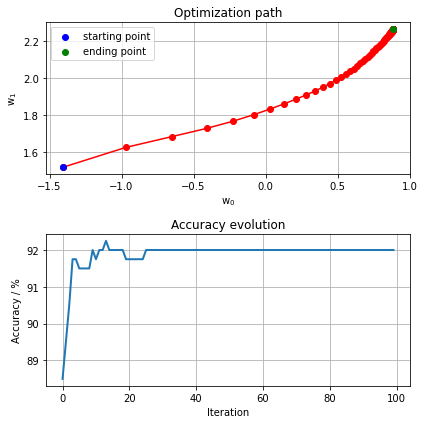

In [31]:
# Plot the results
import matplotlib.pyplot as plt
old_ws = np.array(old_ws)
old_accs = np.array(old_accs)

fig = plt.figure(figsize = [6,6])
ax1 = fig.add_subplot(211)
ax1.plot(old_ws[:,0], old_ws[:,1], 'ro-')
blue_dot = ax1.scatter(old_ws[0,0], old_ws[0,1], color='blue', zorder=10)
green_dot = ax1.scatter(old_ws[-1,0], old_ws[-1,1], color='green', zorder=10)
plt.legend([blue_dot, green_dot], ['starting point','ending point'])
plt.grid()
plt.xlabel('w$_0$')
plt.ylabel('w$_1$')
plt.title('Optimization path')

plt.subplot(212)
plt.plot(100.0 * old_accs, linewidth = 2)
plt.grid()
plt.ylabel('Accuracy / %')
plt.xlabel('Iteration')
plt.title('Accuracy evolution')
plt.tight_layout()

plt.show()

# Question 4
<span style="font-size:18px">Answered to question b)</span> 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D

N = 32 # Number of feature maps
w, h = 5, 5 # Conv. window size

model = Sequential()
model.add(Conv2D(N, (w, h),input_shape=(64, 64, 3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(N, (w, h),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D((4,4)))
model.add(Flatten())
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dense(9, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 9

# Question 5

In [33]:
# a)
import numpy as np
import os
from skimage.io import imread_collection
from sklearn.model_selection import train_test_split
import cv2

# Compile the network of Question 4 b
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Load the data
os.chdir('/home/tuomas/Python/DATA.ML.200/Ex3')
images = []
labels = []
for i in range(0,9):
    fn = '0000{}/*.jpg'.format(i)
    print(fn)
    imgs = imread_collection(fn)
    images.append(np.array(imgs, dtype='object'))
    labels.append( np.ones(len(imgs)) * i )

images = np.concatenate(images)
labels = np.concatenate(labels).astype('uint8')

00000/*.jpg
00001/*.jpg
00002/*.jpg
00003/*.jpg
00004/*.jpg
00005/*.jpg
00006/*.jpg
00007/*.jpg
00008/*.jpg


In [34]:
# Resize all images to 64 x 64
images_resized = []
for img in images:
    img_r = cv2.resize(img, (64,64))
    images_resized.append(img_r/255.)

images_resized = np.array(images_resized)

In [35]:
# Create training and testing sets.
from tensorflow.keras.utils import to_categorical
trainX, testX, trainY, testY = train_test_split(images_resized, 
                                                labels, 
                                                test_size=0.15)

# One-hot encoding
trainY_cat = to_categorical(trainY, num_classes=9)
testY_cat = to_categorical(testY, num_classes=9)

In [36]:
# b)
# Train the model
history = model.fit(trainX, trainY_cat, batch_size=32, epochs=20, validation_data=(testX, testY_cat), verbose=1)
# Evaluate the model
test_loss, test_acc = model.evaluate(testX, testY_cat, verbose=2)
print("Accuracy of CNN = {}".format(test_acc))

Epoch 1/20
237/237 [==============================] - 3s 14ms/step - loss: 1.8738 - accuracy: 0.2727 - val_loss: 1.5935 - val_accuracy: 0.4256
Epoch 2/20
237/237 [==============================] - 1s 5ms/step - loss: 1.3079 - accuracy: 0.5489 - val_loss: 0.9500 - val_accuracy: 0.7210
Epoch 3/20
237/237 [==============================] - 1s 5ms/step - loss: 0.7369 - accuracy: 0.7832 - val_loss: 0.5339 - val_accuracy: 0.8504
Epoch 4/20
237/237 [==============================] - 1s 5ms/step - loss: 0.4071 - accuracy: 0.8928 - val_loss: 0.3252 - val_accuracy: 0.9155
Epoch 5/20
237/237 [==============================] - 1s 5ms/step - loss: 0.2296 - accuracy: 0.9519 - val_loss: 0.2471 - val_accuracy: 0.9342
Epoch 6/20
237/237 [==============================] - 1s 5ms/step - loss: 0.1483 - accuracy: 0.9690 - val_loss: 0.1675 - val_accuracy: 0.9604
Epoch 7/20
237/237 [==============================] - 1s 5ms/step - loss: 0.1018 - accuracy: 0.9819 - val_loss: 0.1215 - val_accuracy: 0.9678
Epoch